<a href="https://colab.research.google.com/github/analyticalaq/Music_and_Therapy-_Survey/blob/main/Music_and_Therapy__Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Lierary**

In [ ]:
import pandas as pd


In [ ]:
import numpy as np

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Music_and_Therapy-_Survey/Music_and_Mental_Health_-_Survey.csv')

In [ ]:
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


**Convert data into data frame for analysis**

In [ ]:
data = pd.DataFrame(data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

**Check missing /null values**

In [ ]:
data.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [ ]:
missing_values_count = data["BPM"].isna().sum()

missing_values_count

107

In [ ]:
data = data.dropna()

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,24.806504,3.697073,123.580488,5.886992,4.889431,3.794309,2.656911
std,11.662600,3.071576,39.601594,2.759466,2.997823,3.109885,2.859098
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,100.000000,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,120.000000,6.000000,5.000000,3.000000,2.000000
75%,27.000000,5.000000,144.000000,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,624.000000,10.000000,10.000000,10.000000,10.000000


**find the outliers**

In [ ]:
# calculate mean and standard deviation
mean = data["BPM"].mean()
std_dev = data["BPM"].std()
# identify outliers
outliers = data[(data["BPM"] < mean - 2*std_dev) | (data["BPM"] > mean + 2*std_dev)]
outliers.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
248,8/28/2022 23:34,20.0,Spotify,2.0,No,Yes,Yes,Metal,No,Yes,...,Never,Rarely,Sometimes,Rarely,0.0,0.0,0.0,1.0,No effect,I understand.
339,8/29/2022 8:37,35.0,Spotify,3.0,No,Yes,No,Folk,Yes,No,...,Never,Never,Sometimes,Sometimes,8.0,2.0,2.0,8.0,No effect,I understand.
353,8/29/2022 10:23,17.0,Spotify,2.0,Yes,No,No,Pop,Yes,Yes,...,Never,Very frequently,Very frequently,Very frequently,7.0,6.0,3.0,1.0,Improve,I understand.
372,8/29/2022 15:05,18.0,Spotify,2.0,Yes,No,No,Hip hop,Yes,Yes,...,Very frequently,Very frequently,Never,Never,10.0,7.0,2.0,0.0,Improve,I understand.
421,8/30/2022 13:07,14.0,Spotify,5.0,Yes,Yes,No,Classical,Yes,Yes,...,Sometimes,Rarely,Rarely,Very frequently,3.0,0.0,2.0,3.0,Improve,I understand.


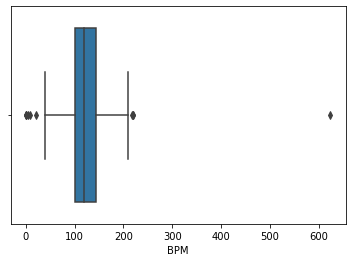

In [ ]:
import seaborn as sns

# create boxplot
sns.boxplot(x=data["BPM"])


**This is typically used to remove outliers from the data before proceeding with further analysis**

In [ ]:
data = data[~data.index.isin(outliers.index)]


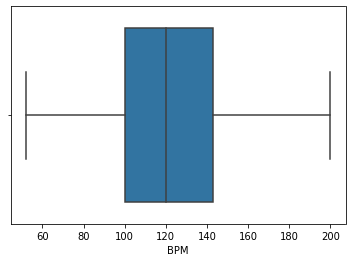

In [ ]:
# create boxplots
sns.boxplot(x=data["BPM"])

In [ ]:
data.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000
mean,24.661667,3.724500,123.026667,5.875833,4.883333,3.79250,2.655000
std,11.385367,3.097396,30.714789,2.753356,2.988384,3.09893,2.851964
min,10.000000,0.000000,52.000000,0.000000,0.000000,0.00000,0.000000
25%,18.000000,2.000000,100.000000,4.000000,2.000000,1.00000,0.000000
50%,21.000000,3.000000,120.000000,6.000000,5.000000,3.00000,2.000000
75%,27.000000,5.000000,143.000000,8.000000,7.000000,6.00000,5.000000
max,89.000000,24.000000,200.000000,10.000000,10.000000,10.00000,10.000000


In [ ]:

age_counts = data['Age'].value_counts()
age_counts.head()



18.0    69
19.0    55
17.0    51
21.0    40
16.0    36
Name: Age, dtype: int64

In [ ]:

hours_per_day_mean = data['Hours per day'].mean()
print("Mean hours per day:", hours_per_day_mean)




Mean hours per day: 3.7244999999999995


**# Assessing correlations**

In [ ]:

corr = data.corr()
print(corr)



                    Age  Hours per day       BPM   Anxiety  Depression  \
Age            1.000000      -0.034425  0.013522 -0.211408   -0.101504   
Hours per day -0.034425       1.000000  0.018493  0.043903    0.092103   
BPM            0.013522       0.018493  1.000000  0.071155    0.057972   
Anxiety       -0.211408       0.043903  0.071155  1.000000    0.523028   
Depression    -0.101504       0.092103  0.057972  0.523028    1.000000   
Insomnia       0.004040       0.124357  0.060701  0.263462    0.358869   
OCD           -0.152290       0.111979 -0.016285  0.347401    0.163874   

               Insomnia       OCD  
Age            0.004040 -0.152290  
Hours per day  0.124357  0.111979  
BPM            0.060701 -0.016285  
Anxiety        0.263462  0.347401  
Depression     0.358869  0.163874  
Insomnia       1.000000  0.201039  
OCD            0.201039  1.000000  


**Assessing Age and Hours per day correlation**

In [ ]:
age_hours_corr = data['Age'].corr(data['Hours per day'])
print("Age and Hours per day correlation:", age_hours_corr)

Age and Hours per day correlation: -0.03442462352855283


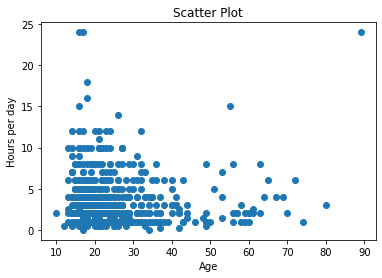

In [ ]:
import matplotlib.pyplot as plt

plt.title('Scatter Plot')
plt.scatter(data['Age'], data['Hours per day'])
plt.xlabel('Age')
plt.ylabel('Hours per day')
plt.show()

**Assessing Anxity and Depression per day correlation**

In [ ]:
anxity_depression_corr = data['Depression'].corr(data['Anxiety'])
print("Anxiety & Depression correlation:", anxity_depression_corr)

Anxiety & Depression correlation: 0.5230281476634367


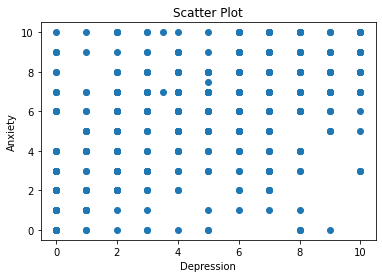

In [ ]:
import matplotlib.pyplot as plt

plt.title('Scatter Plot')
plt.scatter(data['Depression'], data['Anxiety'])
plt.xlabel('Depression')
plt.ylabel('Anxiety')
plt.show()

In [ ]:
genre_colum = [col for col in data.columns if 'Frequency' in col]
corr = data[genre_colum + ['Anxiety', 'Depression', 'Insomnia', 'OCD']].corr()
corr

,Anxiety,Depression,Insomnia,OCD
Anxiety,1.000000,0.523028,0.263462,0.347401
Depression,0.523028,1.000000,0.358869,0.163874
Insomnia,0.263462,0.358869,1.000000,0.201039
OCD,0.347401,0.163874,0.201039,1.000000


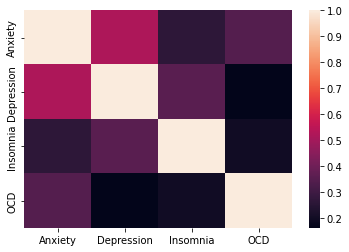

In [ ]:
import seaborn as sns


# Create a heatmap showing the correlation between music genres and mental health states
genre_cols = [col for col in data.columns if 'Frequency' in col]
corr = data[genre_cols + ['Anxiety', 'Depression', 'Insomnia', 'OCD']].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()


In [ ]:
data.to_csv('Music_and_Therapy-_Survey_Cleaned.csv',index=False)

In [ ]:
cleaned_data=pd.read_csv('/content/drive/MyDrive/Music_and_Therapy-_Survey/Music_and_Therapy-_Survey_Cleaned.csv')

In [ ]:
cleaned_data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 21:28,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
1,8/27/2022 21:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
2,8/27/2022 21:54,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
3,8/27/2022 21:56,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
4,8/27/2022 22:00,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     600 non-null    object 
 1   Age                           600 non-null    float64
 2   Primary streaming service     600 non-null    object 
 3   Hours per day                 600 non-null    float64
 4   While working                 600 non-null    object 
 5   Instrumentalist               600 non-null    object 
 6   Composer                      600 non-null    object 
 7   Fav genre                     600 non-null    object 
 8   Exploratory                   600 non-null    object 
 9   Foreign languages             600 non-null    object 
 10  BPM                           600 non-null    float64
 11  Frequency [Classical]         600 non-null    object 
 12  Frequency [Country]           600 non-null    object 
 13  Frequ

In [ ]:
data.isnull().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      